In [1]:
mkdir ~/.kaggle

In [2]:
cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009

  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 2.02MB/s]


In [5]:
! unzip red-wine-quality-cortez-et-al-2009.zip

Archive:  red-wine-quality-cortez-et-al-2009.zip
  inflating: winequality-red.csv     


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df_winequality = pd.read_csv('winequality-red.csv')
df_winequality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
df_winequality.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [13]:
df_winequality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
df_winequality.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
df_winequality.duplicated().sum()

240

In [16]:
df_winequality.drop_duplicates(keep='first',inplace=True)

In [17]:
df_winequality.duplicated().sum()

0

<Axes: >

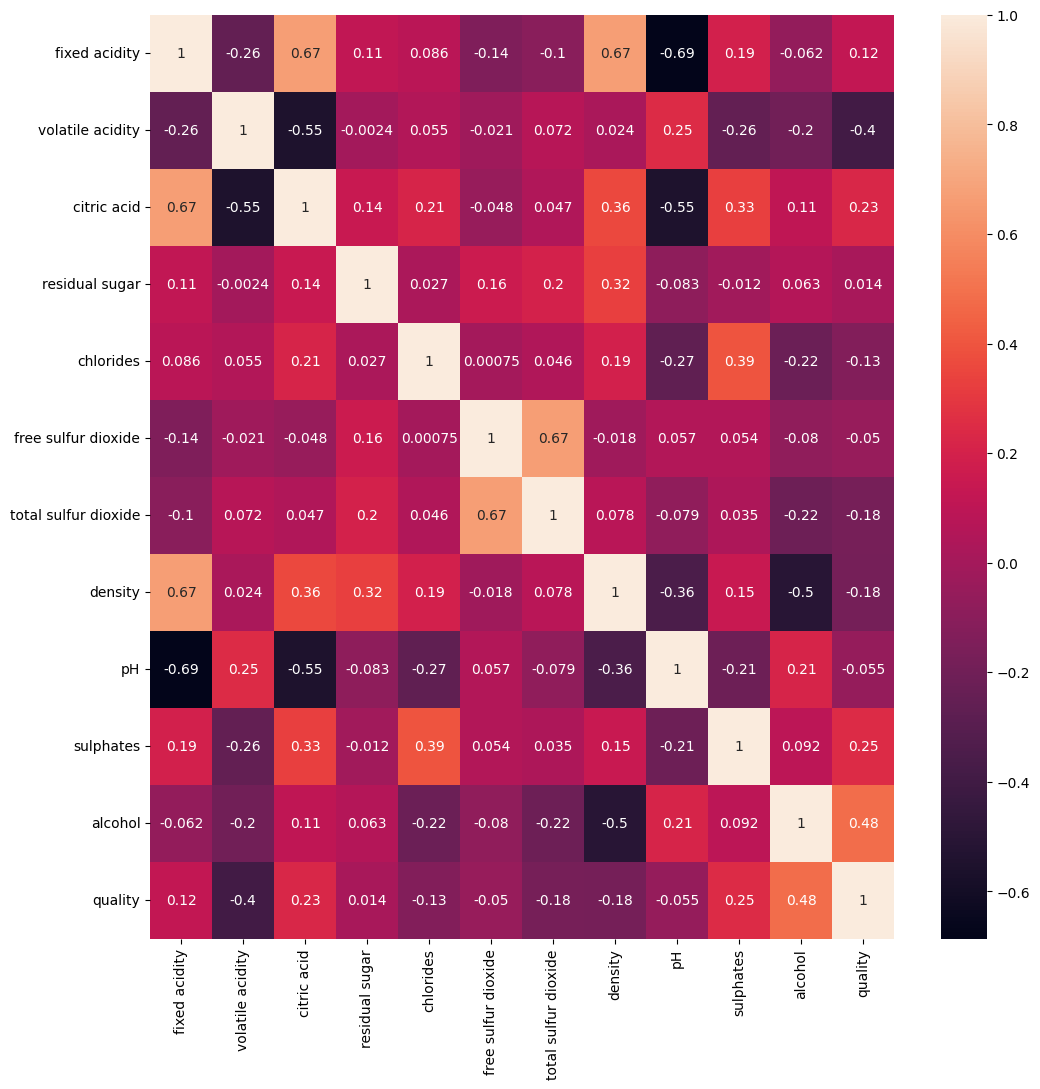

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(df_winequality.corr(),annot=True)

In [23]:
x = df_winequality.drop(['fixed acidity','residual sugar','chlorides','free sulfur dioxide','pH','quality'], axis=1)
y = df_winequality['quality']

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [25]:
x_train.shape, x_test.shape

((1087, 6), (272, 6))

In [26]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=10)

In [27]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [28]:
model.score(x_test, y_test)

0.5698529411764706

In [30]:
# Due to low accuracy because of quality value changing it to 1 and 0, 1 if more than 6.5 else it will be 0 

df_winequality['quality'] = df_winequality['quality'].apply(lambda x : 1 if x > 6.5 else 0)

In [32]:
x = df_winequality.drop(['fixed acidity','residual sugar','chlorides','free sulfur dioxide','pH','quality'], axis=1)
y = df_winequality['quality']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [34]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [35]:
model.score(x_test, y_test)

0.8897058823529411